## 1.回归模型

### 线性回归

截距: 1.379999999999999
系数: [0.74]
预测值: [5.82]


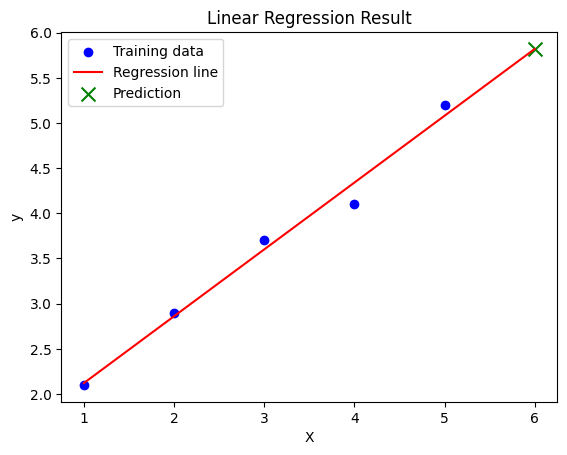

In [7]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

# 构造数据
X = np.array([[1], [2], [3], [4], [5]])
y = np.array([2.1, 2.9, 3.7, 4.1, 5.2])

# 训练线性回归模型
model = LinearRegression()
model.fit(X, y)

# 查看截距和系数
print("截距:", model.intercept_)
print("系数:", model.coef_)

# 预测新数据
X_new = np.array([[6]])
y_pred = model.predict(X_new)
print("预测值:", y_pred)
# ---------------- 绘图部分 ----------------
# 绘制训练数据点（蓝色散点）
plt.scatter(X, y, color="blue", label="Training data")

# 绘制回归直线（红色直线）
X_line = np.linspace(1, 6, 100).reshape(-1, 1)  # 生成平滑曲线点
y_line = model.predict(X_line)
plt.plot(X_line, y_line, color="red", label="Regression line")

# 绘制预测点（绿色叉号）
plt.scatter(X_new, y_pred, color="green", marker="x", s=100, label="Prediction")

# 设置坐标轴和标题
plt.xlabel("X")
plt.ylabel("y")
plt.title("Linear Regression Result")
plt.legend()
plt.show()

### 岭回归

截距: 1.581818181818182
系数: [0.67272727]
最佳 λ: 0.01


/home/wlt/anaconda3/envs/wlt/lib/python3.7/site-packages/sklearn/metrics/_regression.py:796: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/home/wlt/anaconda3/envs/wlt/lib/python3.7/site-packages/sklearn/metrics/_regression.py:796: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/home/wlt/anaconda3/envs/wlt/lib/python3.7/site-packages/sklearn/metrics/_regression.py:796: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/home/wlt/anaconda3/envs/wlt/lib/python3.7/site-packages/sklearn/metrics/_regression.py:796: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/home/wlt/anaconda3/envs/wlt/lib/python3.7/site-packages/sklearn/metrics/_regression.py:796: UndefinedMetricWarning: R^2

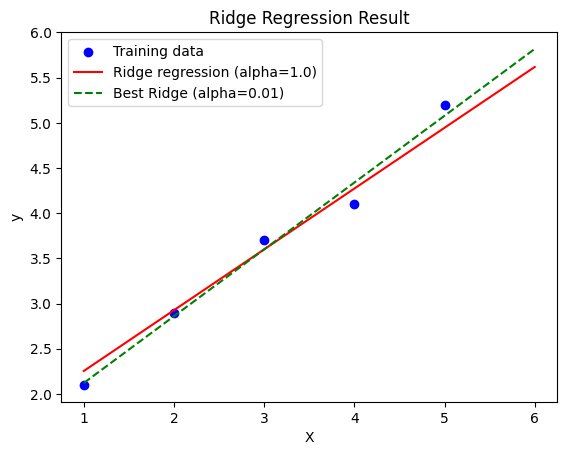

In [8]:
import numpy as np
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV

# 构造数据
X = np.array([[1], [2], [3], [4], [5]])
y = np.array([2.1, 2.9, 3.7, 4.1, 5.2])

# 使用 Ridge 回归
ridge = Ridge(alpha=1.0)  # alpha 对应 λ
ridge.fit(X, y)

print("截距:", ridge.intercept_)
print("系数:", ridge.coef_)

# 使用 GridSearchCV 寻找最佳 λ
param_grid = {'alpha': [0.01, 0.1, 1, 10, 100]}
grid = GridSearchCV(Ridge(), param_grid, cv=5)
grid.fit(X, y)
print("最佳 λ:", grid.best_params_['alpha'])
# ---------------- 绘图部分 ----------------
# 绘制训练数据点（蓝色散点）
plt.scatter(X, y, color="blue", label="Training data")

# 绘制回归直线（红色直线）
X_line = np.linspace(1, 6, 100).reshape(-1, 1)  # 在区间 [1,6] 上生成平滑点
y_line = ridge.predict(X_line)
plt.plot(X_line, y_line, color="red", label=f"Ridge regression (alpha=1.0)")

# 标注最佳 alpha 的拟合曲线（绿色虚线）
best_ridge = Ridge(alpha=grid.best_params_['alpha'])
best_ridge.fit(X, y)
y_best_line = best_ridge.predict(X_line)
plt.plot(X_line, y_best_line, color="green", linestyle="--", 
         label=f"Best Ridge (alpha={grid.best_params_['alpha']})")

# 设置坐标轴和标题
plt.xlabel("X")
plt.ylabel("y")
plt.title("Ridge Regression Result")
plt.legend()
plt.show()

### Lasso回归

截距: 1.4399999999999995
系数: [1.62000000e+00 2.66453526e-16 0.00000000e+00]
最佳 λ: 0.01


/home/wlt/anaconda3/envs/wlt/lib/python3.7/site-packages/sklearn/metrics/_regression.py:796: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/home/wlt/anaconda3/envs/wlt/lib/python3.7/site-packages/sklearn/metrics/_regression.py:796: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/home/wlt/anaconda3/envs/wlt/lib/python3.7/site-packages/sklearn/metrics/_regression.py:796: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/home/wlt/anaconda3/envs/wlt/lib/python3.7/site-packages/sklearn/metrics/_regression.py:796: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/home/wlt/anaconda3/envs/wlt/lib/python3.7/site-packages/sklearn/metrics/_regression.py:796: UndefinedMetricWarning: R^2

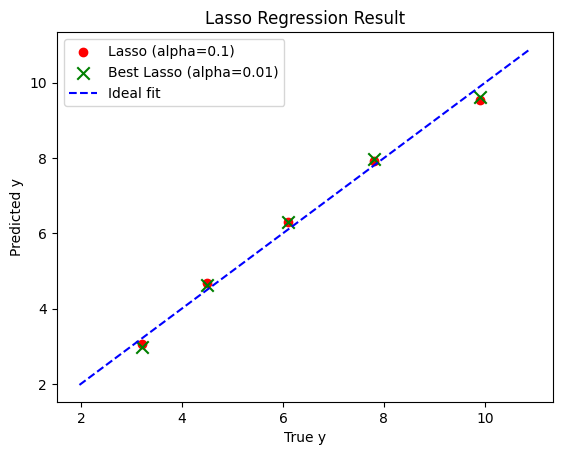

In [9]:
import numpy as np
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV

# 构造数据
X = np.array([[1, 2, 3],
              [2, 3, 4],
              [3, 4, 5],
              [4, 5, 6],
              [5, 6, 7]])
y = np.array([3.2, 4.5, 6.1, 7.8, 9.9])

# 使用 Lasso 回归
lasso = Lasso(alpha=0.1)  # alpha 即 λ
lasso.fit(X, y)

print("截距:", lasso.intercept_)
print("系数:", lasso.coef_)

# 使用交叉验证选择 λ
param_grid = {'alpha': [0.01, 0.1, 1, 10]}
grid = GridSearchCV(Lasso(), param_grid, cv=5)
grid.fit(X, y)
print("最佳 λ:", grid.best_params_['alpha'])
# ---------------- 绘图部分 ----------------
# 预测训练集上的结果
y_pred = lasso.predict(X)
y_best_pred = grid.best_estimator_.predict(X)

# 绘制真实值 vs 预测值
plt.scatter(y, y_pred, color="red", label=f"Lasso (alpha=0.1)")
plt.scatter(y, y_best_pred, color="green", marker="x", s=80, 
            label=f"Best Lasso (alpha={grid.best_params_['alpha']})")

# 添加对角线（y=x，理想拟合线）
max_val = max(y.max(), y_pred.max(), y_best_pred.max()) + 1
min_val = min(y.min(), y_pred.min(), y_best_pred.min()) - 1
plt.plot([min_val, max_val], [min_val, max_val], color="blue", linestyle="--", label="Ideal fit")

# 设置图形属性
plt.xlabel("True y")
plt.ylabel("Predicted y")
plt.title("Lasso Regression Result")
plt.legend()
plt.show()

### 多项式回归

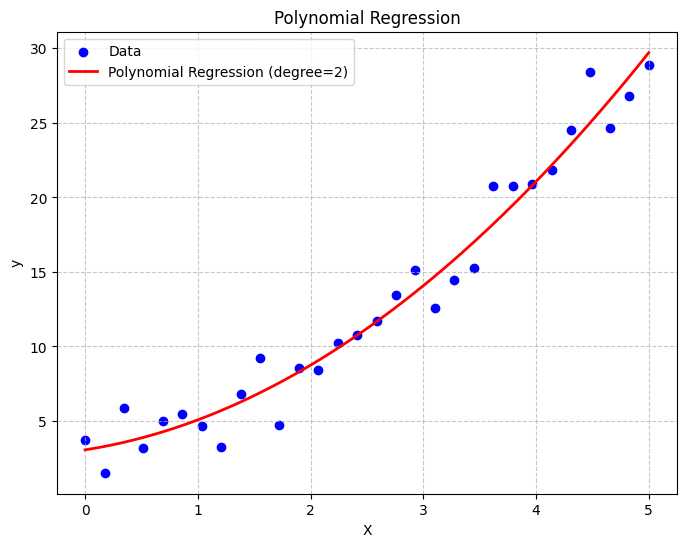

In [11]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures

# 构造数据
X = np.linspace(0, 5, 30).reshape(-1, 1)
y = 2 + 1.5 * X + 0.8 * X**2 + np.random.randn(30, 1) * 2  # 二次关系 + 噪声

# 二次多项式特征扩展
poly = PolynomialFeatures(degree=2)  
X_poly = poly.fit_transform(X)

# 拟合模型
model = LinearRegression()
model.fit(X_poly, y)

# 预测
X_test = np.linspace(0, 5, 100).reshape(-1, 1)
y_pred = model.predict(poly.transform(X_test))

# 可视化
plt.figure(figsize=(8, 6))
plt.scatter(X, y, color="blue", label="Data")  # 真实数据
plt.plot(X_test, y_pred, color="red", linewidth=2, label="Polynomial Regression (degree=2)")  # 回归曲线
plt.xlabel("X")      # x 轴标签
plt.ylabel("y")      # y 轴标签
plt.title("Polynomial Regression")  # 标题
plt.legend()
plt.grid(True, linestyle="--", alpha=0.7)  # 加网格线
plt.show()


## 2.分类模型

### 逻辑回归

准确率: 0.865


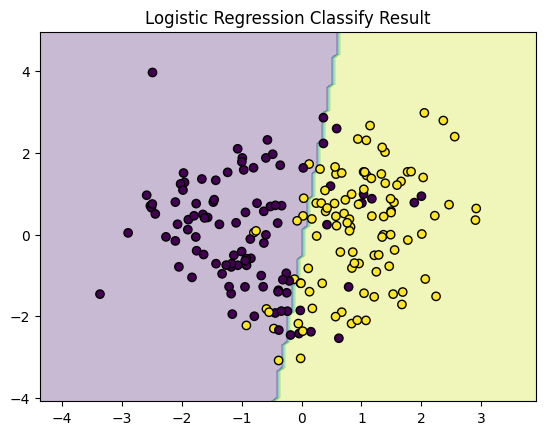

In [13]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# 生成二分类数据
X, y = make_classification(n_samples=200, n_features=2, 
                           n_redundant=0, n_informative=2,
                           random_state=42)

# 拟合逻辑回归模型
model = LogisticRegression()
model.fit(X, y)

# 预测
y_pred = model.predict(X)
print("准确率:", accuracy_score(y, y_pred))

# 可视化分类边界
x_min, x_max = X[:, 0].min()-1, X[:, 0].max()+1
y_min, y_max = X[:, 1].min()-1, X[:, 1].max()+1
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100),
                     np.linspace(y_min, y_max, 100))
Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.contourf(xx, yy, Z, alpha=0.3)
plt.scatter(X[:, 0], X[:, 1], c=y, edgecolors='k')
plt.title("Logistic Regression Classify Result")
plt.show()

### 朴素贝叶斯

Accuracy: 0.80


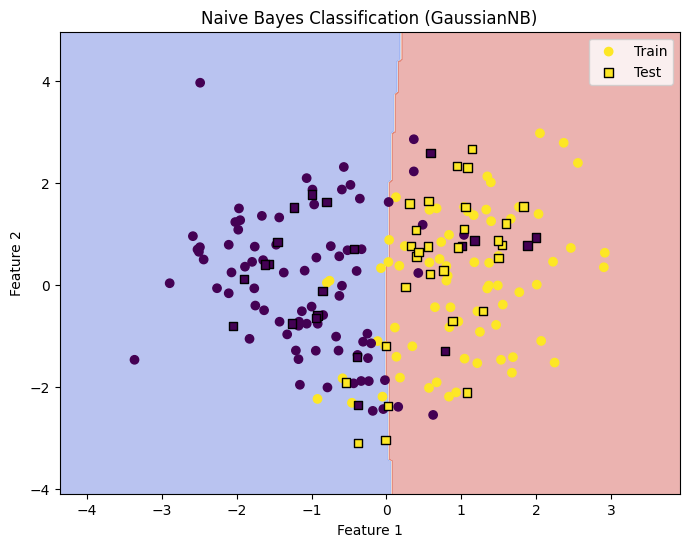

In [14]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score

def naive_bayes_demo():
    """
    朴素贝叶斯分类示例函数
    """
    # 1. 构造二维分类数据
    X, y = make_classification(
        n_samples=200, n_features=2, n_classes=2, 
        n_informative=2, n_redundant=0, random_state=42
    )
    
    # 2. 拆分训练集和测试集
    train_size = 150
    X_train, X_test = X[:train_size], X[train_size:]
    y_train, y_test = y[:train_size], y[train_size:]
    
    # 3. 训练 Gaussian Naive Bayes 模型
    model = GaussianNB()
    model.fit(X_train, y_train)
    
    # 4. 测试集预测
    y_pred = model.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    print(f"Accuracy: {acc:.2f}")
    
    # 5. 可视化分类边界
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 200),
                         np.linspace(y_min, y_max, 200))
    
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    
    plt.figure(figsize=(8, 6))
    plt.contourf(xx, yy, Z, alpha=0.4, cmap=plt.cm.coolwarm)
    plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, marker='o', label="Train")
    plt.scatter(X_test[:, 0], X_test[:, 1], c=y_test, marker='s', edgecolor="k", label="Test")
    plt.xlabel("Feature 1")
    plt.ylabel("Feature 2")
    plt.title("Naive Bayes Classification (GaussianNB)")
    plt.legend()
    plt.show()

# 调用示例
naive_bayes_demo()


### 最近邻（KNN）

In [15]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report

# 1. 加载数据集
iris = load_iris()
X, y = iris.data, iris.target

# 2. 划分训练集与测试集
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# 3. 特征标准化（非常重要，避免不同量纲影响距离计算）
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# 4. 定义并训练KNN模型
knn = KNeighborsClassifier(n_neighbors=5, weights='distance')  # K=5，距离加权
knn.fit(X_train, y_train)

# 5. 预测
y_pred = knn.predict(X_test)

# 6. 评估结果
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred, target_names=iris.target_names))

Accuracy: 1.0
Classification Report:
               precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        19
  versicolor       1.00      1.00      1.00        13
   virginica       1.00      1.00      1.00        13

    accuracy                           1.00        45
   macro avg       1.00      1.00      1.00        45
weighted avg       1.00      1.00      1.00        45



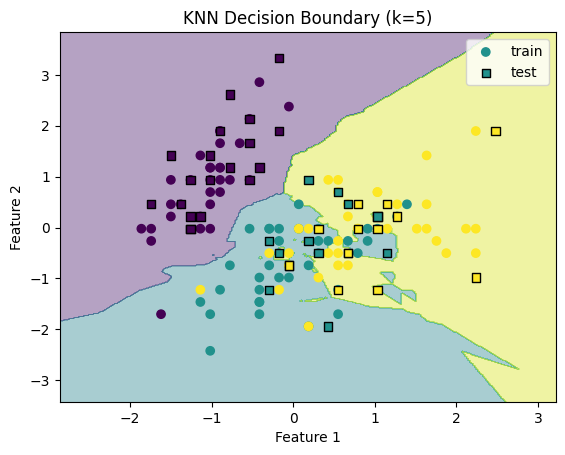

In [16]:
import matplotlib.pyplot as plt
import numpy as np

# 仅取iris前两个特征用于可视化
X_vis = X[:, :2]
X_train_vis, X_test_vis, y_train, y_test = train_test_split(X_vis, y, test_size=0.3, random_state=42)
scaler = StandardScaler()
X_train_vis = scaler.fit_transform(X_train_vis)
X_test_vis = scaler.transform(X_test_vis)

# 训练KNN
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train_vis, y_train)

# 网格预测
x_min, x_max = X_train_vis[:, 0].min() - 1, X_train_vis[:, 0].max() + 1
y_min, y_max = X_train_vis[:, 1].min() - 1, X_train_vis[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.02),
                     np.arange(y_min, y_max, 0.02))
Z = knn.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# 绘图
plt.contourf(xx, yy, Z, alpha=0.4)
plt.scatter(X_train_vis[:, 0], X_train_vis[:, 1], c=y_train, marker='o', label='train')
plt.scatter(X_test_vis[:, 0], X_test_vis[:, 1], c=y_test, marker='s', label='test', edgecolor='k')
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.title("KNN Decision Boundary (k=5)")
plt.legend()
plt.show()

### 支持向量机（SVM）

In [17]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report

# 1. 加载数据
iris = load_iris()
X, y = iris.data, iris.target

# 2. 仅选择两个类别做二分类任务
X = X[y != 2]
y = y[y != 2]

# 3. 划分训练/测试集
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# 4. 标准化
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# 5. 定义SVM模型（RBF核）
svm_clf = SVC(kernel='rbf', C=1.0, gamma='scale')
svm_clf.fit(X_train, y_train)

# 6. 预测
y_pred = svm_clf.predict(X_test)

# 7. 评估
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

Accuracy: 1.0
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        17
           1       1.00      1.00      1.00        13

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



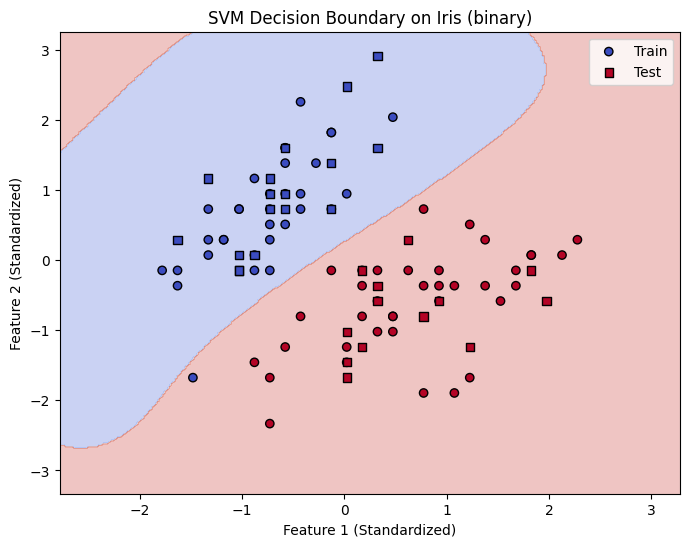

In [18]:
import numpy as np
import matplotlib.pyplot as plt

# 可视化 (选择前两个特征绘制决策边界)
X_vis = X_train[:, :2]  # 取前两个特征
X_test_vis = X_test[:, :2]

svm_clf_vis = SVC(kernel='rbf', C=1.0, gamma='scale')
svm_clf_vis.fit(X_vis, y_train)

# 网格坐标
x_min, x_max = X_vis[:, 0].min() - 1, X_vis[:, 0].max() + 1
y_min, y_max = X_vis[:, 1].min() - 1, X_vis[:, 1].max() + 1
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 300),
                     np.linspace(y_min, y_max, 300))

# 预测网格点类别
Z = svm_clf_vis.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# 绘制
plt.figure(figsize=(8, 6))
plt.contourf(xx, yy, Z, alpha=0.3, cmap=plt.cm.coolwarm)
plt.scatter(X_vis[:, 0], X_vis[:, 1], c=y_train, cmap=plt.cm.coolwarm, edgecolor='k', label="Train")
plt.scatter(X_test_vis[:, 0], X_test_vis[:, 1], c=y_test, cmap=plt.cm.coolwarm, marker='s', edgecolor='k', label="Test")
plt.xlabel("Feature 1 (Standardized)")
plt.ylabel("Feature 2 (Standardized)")
plt.title("SVM Decision Boundary on Iris (binary)")
plt.legend()
plt.show()


### 决策树

In [19]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, export_text
from sklearn.metrics import accuracy_score

# 1. 加载数据
iris = load_iris()
X, y = iris.data, iris.target

# 2. 划分训练/测试集
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# 3. 构建决策树（CART算法，使用基尼指数）
clf = DecisionTreeClassifier(criterion="gini", max_depth=3, random_state=42)
clf.fit(X_train, y_train)

# 4. 预测
y_pred = clf.predict(X_test)

# 5. 评估
print("Accuracy:", accuracy_score(y_test, y_pred))

# 6. 打印规则
tree_rules = export_text(clf, feature_names=iris.feature_names)
print(tree_rules)

Accuracy: 1.0
|--- petal length (cm) <= 2.45
|   |--- class: 0
|--- petal length (cm) >  2.45
|   |--- petal length (cm) <= 4.75
|   |   |--- petal width (cm) <= 1.60
|   |   |   |--- class: 1
|   |   |--- petal width (cm) >  1.60
|   |   |   |--- class: 2
|   |--- petal length (cm) >  4.75
|   |   |--- petal width (cm) <= 1.75
|   |   |   |--- class: 1
|   |   |--- petal width (cm) >  1.75
|   |   |   |--- class: 2



### 随机森林

In [20]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

# 1. 加载数据
iris = load_iris()
X, y = iris.data, iris.target

# 2. 划分训练/测试集
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# 3. Bagging（基于决策树）
bagging_clf = BaggingClassifier(
    base_estimator=DecisionTreeClassifier(),
    n_estimators=100,
    max_samples=0.8,
    max_features=1.0,
    random_state=42
)
bagging_clf.fit(X_train, y_train)
y_pred_bag = bagging_clf.predict(X_test)
print("Bagging Accuracy:", accuracy_score(y_test, y_pred_bag))

# 4. 随机森林
rf_clf = RandomForestClassifier(
    n_estimators=100,
    max_depth=None,
    max_features='sqrt',
    random_state=42
)
rf_clf.fit(X_train, y_train)
y_pred_rf = rf_clf.predict(X_test)
print("Random Forest Accuracy:", accuracy_score(y_test, y_pred_rf))

# 5. 特征重要性
print("Feature Importances:", rf_clf.feature_importances_)

Bagging Accuracy: 1.0
Random Forest Accuracy: 1.0
Feature Importances: [0.10410501 0.04460499 0.41730813 0.43398187]


### Boosting方法

In [1]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.ensemble import AdaBoostClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score

# 1. 加载数据
iris = load_iris()
X, y = iris.data, iris.target

# 2. 划分训练/测试集
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# 3. AdaBoost
adaboost_clf = AdaBoostClassifier(n_estimators=50, learning_rate=1.0, random_state=42)
adaboost_clf.fit(X_train, y_train)
y_pred_ada = adaboost_clf.predict(X_test)
print("AdaBoost Accuracy:", accuracy_score(y_test, y_pred_ada))

# 4. XGBoost
xgb_clf = XGBClassifier(n_estimators=100, learning_rate=0.1, use_label_encoder=False, eval_metric='mlogloss')
xgb_clf.fit(X_train, y_train)
y_pred_xgb = xgb_clf.predict(X_test)
print("XGBoost Accuracy:", accuracy_score(y_test, y_pred_xgb))

AdaBoost Accuracy: 1.0
XGBoost Accuracy: 1.0


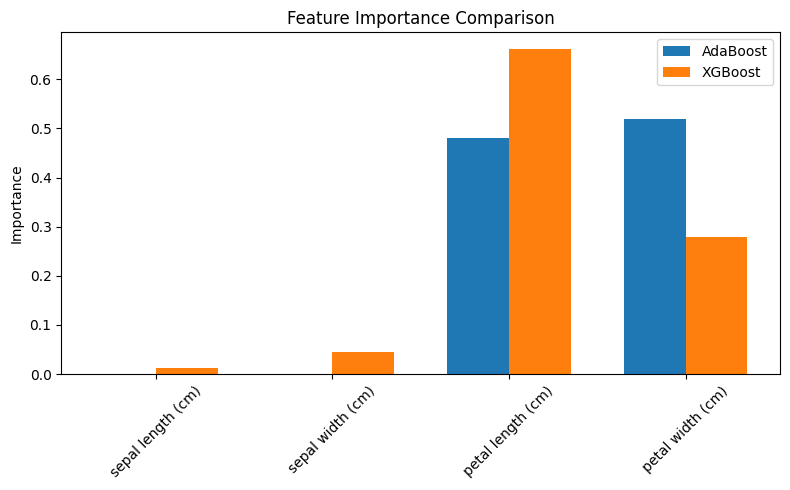

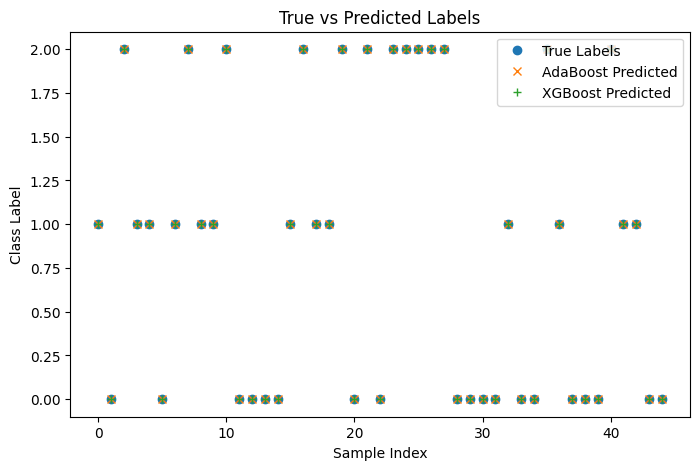

In [2]:
import matplotlib.pyplot as plt
import numpy as np

# ----------- 绘制特征重要性 -----------
# AdaBoost 特征重要性
ada_importances = adaboost_clf.feature_importances_
xgb_importances = xgb_clf.feature_importances_

features = iris.feature_names  # 特征名称

x = np.arange(len(features))
width = 0.35

fig, ax = plt.subplots(figsize=(8,5))
rects1 = ax.bar(x - width/2, ada_importances, width, label='AdaBoost')
rects2 = ax.bar(x + width/2, xgb_importances, width, label='XGBoost')

ax.set_ylabel('Importance')
ax.set_title('Feature Importance Comparison')
ax.set_xticks(x)
ax.set_xticklabels(features, rotation=45)
ax.legend()
plt.tight_layout()
plt.show()

# ----------- 绘制预测结果对比 -----------
plt.figure(figsize=(8,5))
plt.plot(y_test, 'o', label='True Labels')
plt.plot(y_pred_ada, 'x', label='AdaBoost Predicted')
plt.plot(y_pred_xgb, '+', label='XGBoost Predicted')
plt.xlabel('Sample Index')
plt.ylabel('Class Label')
plt.title('True vs Predicted Labels')
plt.legend()
plt.show()


### Stacking方法

In [5]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.ensemble import StackingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

# 1. 加载数据
iris = load_iris()
X, y = iris.data, iris.target

# 2. 划分训练/测试集
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# 3. 构建基模型和元模型
base_models = [
    ('dt', DecisionTreeClassifier(max_depth=3)),
    ('knn', KNeighborsClassifier(n_neighbors=3))
]
meta_model = LogisticRegression()

# 4. 构建 Stacking 模型
stacking_clf = StackingClassifier(estimators=base_models, final_estimator=meta_model)
stacking_clf.fit(X_train, y_train)

# 5. 预测与评估
y_pred = stacking_clf.predict(X_test)
print("Stacking Accuracy:", accuracy_score(y_test, y_pred))

Stacking Accuracy: 1.0


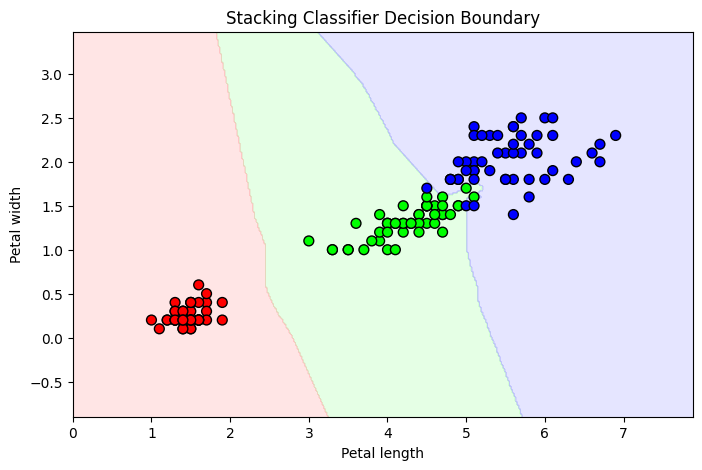

In [6]:
from sklearn.ensemble import StackingClassifier
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.colors import ListedColormap

# 仅使用前两个特征
X_vis = X[:, 2:4]
X_train_vis, X_test_vis, y_train_vis, y_test_vis = train_test_split(
    X_vis, y, test_size=0.3, random_state=42
)

# 训练 stacking 模型（用两个特征）
stacking_clf_vis = StackingClassifier(
    estimators=base_models, final_estimator=meta_model
)
stacking_clf_vis.fit(X_train_vis, y_train_vis)

# 创建网格
x_min, x_max = X_vis[:, 0].min() - 1, X_vis[:, 0].max() + 1
y_min, y_max = X_vis[:, 1].min() - 1, X_vis[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.02),
                     np.arange(y_min, y_max, 0.02))

Z = stacking_clf_vis.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# 绘制决策边界
plt.figure(figsize=(8,5))
cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF'])
cmap_bold = ListedColormap(['#FF0000', '#00FF00', '#0000FF'])
plt.contourf(xx, yy, Z, alpha=0.3, cmap=cmap_light)
plt.scatter(X_vis[:, 0], X_vis[:, 1], c=y, cmap=cmap_bold, edgecolor='k', s=50)
plt.xlabel('Petal length')
plt.ylabel('Petal width')
plt.title('Stacking Classifier Decision Boundary')
plt.show()
